# Нормальное распределение

Нормальное распределение, это распределение, которое соответствует следующим критериям:
- унимодальность;
- симметричность;
- отклонения подчиняются вероятностному закону нормального распределения.

Например:

* В диапазоне от среднего до 1σ (одного стандартного отклонения) будет находиться примерно 34.1% всех наблюдений

* В диапазоне от 1σσσ до 2σ – примерно 13.6%

* Очень маловероятно встретить наблюдение, которое бы превосходило среднее значение больше чем на 3 стандартных отклонения (3σ) 

Также мы можем заметить, что отклонение от среднего равновероятно как в большую, так и в меньшую стороны.

<img src='./images/1.2_normal_distribution.png'></img>

Пример в Python:

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


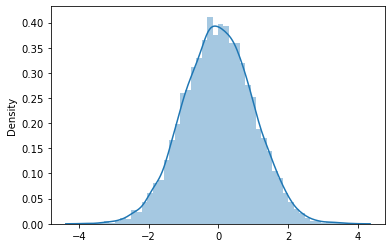

In [48]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=10000), hist=True)
plt.show()

# Стандартизация

**Стандартизация** (Z-преобразование) – преобразование, которое позволяет любую шкалу перевести в стандартную Z-шкалу (Z-scores), где среднее значение будет равно нулю, а стандартное отклонение равняться единице. Форма распределения при этом не изменится.

Таким образом, если мы из каждого наблюдения в нашей выборке отнимем среднее значение и разделим выражение на стандартное отклонение, то получим Z-шкалу, где новое среднее станет равно нулю, а дисперсия – единице.

<span style="font-size:1.5em;">$Z_i$ = $\frac{x_{i} - \overline{X}}{σ_x}$</span>

>`from scipy.stats import zscore`
>
>`zscore(df.column_1)`

# Правило "двух" и "трех" сигм

<span style="font-size:1.0em;">$M_x$±σ≈68%</span> наблюдений находятся в этом интервале

<span style="font-size:1.0em;">$M_x$±2σ≈95%</span> наблюдений находятся в этом интервале

<span style="font-size:1.0em;">$M_x$±3σ≈100%</span> наблюдений находятся в этом интервале

Например: среднее значение равняется 50, а стандартное отклонение равно 4. Какой процент наблюдений превосходит значение, равное 52?

Для этого нужно сделать Z-преобразование: (52 - 50) / 4 = 0.5

Далее узнаем ответ с помощью таблицы z-значений.


Так как нормальное распределение симметрично, то знак z-значения не принципиален.

<img src='./images/1.2_z-score-table.jpg'></img>

В диапазоне превышающем 0.5 в z-шкале находится примерно 30% наших наблюдений. То есть вероятность встретить значение, превосходящее 0.5 в z-шкале равна 30%.

# Центральная предельная теорема

Предположим, что некоторый признак нормально распределен в генеральной совокупности (ГС), среднее = 0, стандартное отклонение = 15. 

<img src='./images/1.2_clt2.png'></img>

Если мы будем многократно извлекать выборки по 35 наблюдений из генеральной совокупности и внутри каждой выборки рассчитывать среднее значение и стандартное отклонение, то заметим, что распределение признака будет изменяться от выборки к выборке, при этом значения средних также будет варьироваться в положительную или отрицательную сторону.

<img src='./images/1.2_clt3.png'></img>

Далее мы строим распределение выборочных средних значений. Если в каждой выборке оценка среднего не является точной, то среднее всех средних будет очень близко к реальному среднему в генеральной совокупности. Большинство всех средних будет лежать рядом с нулем, а какие-то – отклоняться.

<img src='./images/1.2_clt4.png'></img>

Стандартное отклонение этого распределения называется **стандартной ошибкой среднего**. Она показывает, насколько выборочные средние отклоняются от среднего ГС.

Если мы увеличим объем каждой из выборок, то распределение признака внутри каждой из групп станет больше похоже на распределение в ГС.

<img src='./images/1.2_clt5.png'></img>

Оценки также станут более точными, при этом стандартная ошибка уменьшится.

<img src='./images/1.2_clt6.png'></img>

Иными словами: при увеличении числа выборок и их размера уменьшается изменчивость выборочного распределения средних, и средние выборок будут находиться ближе к реальному среднему ГС (закон больших чисел).

**При достаточных размерах выборок и повторных их извлечений выборочное распределение средних будет нормальным даже если признак в ГС распределен не нормально!**

[Калькулятор для симуляции ЦПТ](https://gallery.shinyapps.io/CLT_mean/)

# Стандартная ошибка среднего

**Стандартная ошибка среднего (SE)** — показывает, насколько выборочное среднее отличается от среднего генеральной совокупности. SE при увеличении размера выборки будет стремиться к нулю.

se = σ / $\sqrt{n}$

Если выборка репрезентативна и число наблюдений n ≥ 30, то в качестве стандартного отклонения ГС мы можем использовать стандартное отклонение выборки:

se = $sd_x$ / $\sqrt{n}$

>df.column_1.sem() # pandas
>
>stats.sem(df.column_1) # scipy.stats